In [31]:
import matplotlib.pyplot as plt

from experiment import Experiment, decimal_range_hundreds

In [32]:
exp = Experiment(decimal_range_hundreds(0.5, 1., 0.05), decimal_range_hundreds(0.5, 1., 0.05))
exp.run()

for r in exp.results:
    print(r, exp.results[r][-1])

al_0.5_bet_0.5 0.5780656958161586
al_0.5_bet_0.55 1.0651734405540045
al_0.5_bet_0.6 1.6556725142818052
al_0.5_bet_0.65 3.1618368305684963
al_0.5_bet_0.7 5.443050768619991
al_0.5_bet_0.75 8.694438032815416
al_0.5_bet_0.8 15.234113692755978
al_0.5_bet_0.85 23.282750939357964
al_0.5_bet_0.9 40.98487144356147
al_0.5_bet_0.95 54.15418215885177
al_0.5_bet_1.0 100.0
al_0.55_bet_0.5 0.7154593942765503
al_0.55_bet_0.55 0.9702178033626548
al_0.55_bet_0.6 1.8145748104724655
al_0.55_bet_0.65 3.0938616834022685
al_0.55_bet_0.7 5.947878285985362
al_0.55_bet_0.75 7.337595000577154
al_0.55_bet_0.8 13.609675136768754
al_0.55_bet_0.85 20.31923338803611
al_0.55_bet_0.9 36.176169474570145
al_0.55_bet_0.95 58.697323108401676
al_0.55_bet_1.0 100.0
al_0.6_bet_0.5 0.5875485301882268
al_0.6_bet_0.55 1.0773137434194493
al_0.6_bet_0.6 1.838706365203468
al_0.6_bet_0.65 3.0889923035485243
al_0.6_bet_0.7 4.877029693039752
al_0.6_bet_0.75 8.687777097778994
al_0.6_bet_0.8 13.83438575449698
al_0.6_bet_0.85 19.69689229

In [33]:
vlaues_to_plot = [(0.5, 0.5), (0.5, 0.8), (0.5, 0.95),
                  (0.8, 0.5), (0.8, 0.8), (0.8, 0.95),
                  (0.95, 0.5), (0.95, 0.8), (1.0, 1.0),
                 ]

def plot_result(ax, alpha, betha):
    y = exp.results['al_' + str(alpha) + '_bet_' + str(betha)]
    x = np.arange(0, len(y))
    ax.plot(x, y, lw=1, color='blue')


In [34]:
import numpy as np

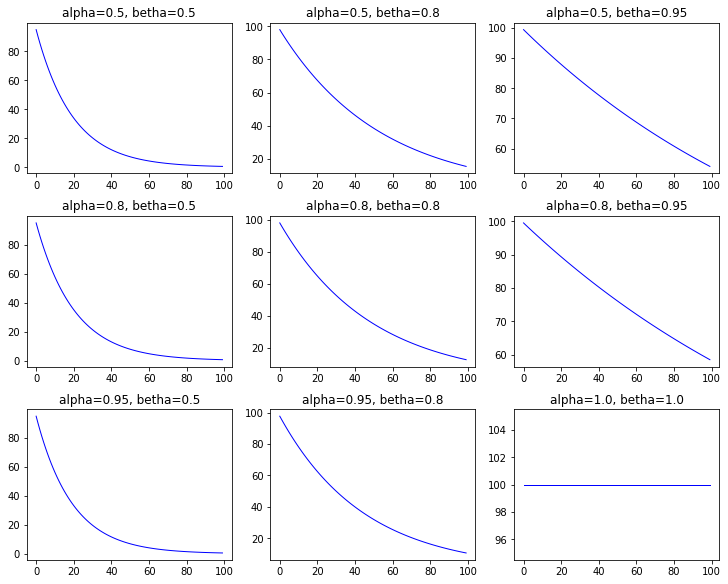

In [35]:
fig1, axs = plt.subplots(3, 3, figsize=(10, 8), constrained_layout=True)

axs = axs.flat
for ax, albt in zip(axs, vlaues_to_plot):
    ax.set_title(f'alpha={albt[0]}, betha={albt[1]}')
    plot_result(ax, *albt)

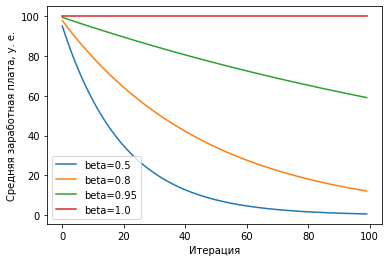

In [36]:

for beta in [0.5, 0.8, 0.95, 1.0]:
    y = exp.results['al_' + str(1.0) + '_bet_' + str(beta)]
    x = np.arange(0, len(y))
    plt.plot(x, y, label=f'beta={beta}')
plt.xlabel('Итерация')
plt.ylabel('Средняя заработная плата, у. е.')
plt.legend()
plt.show()

In [50]:
exp1 = Experiment(decimal_range_hundreds(0.5, 1., 0.05), [0.84])
exp1.run()

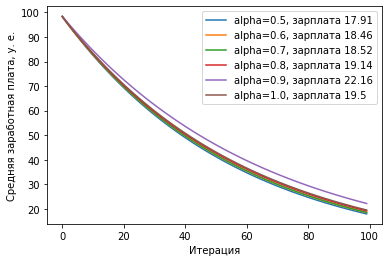

In [51]:
for alpha in [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    y = exp1.results['al_' + str(alpha) + '_bet_' + str(0.84)]
    x = np.arange(0, len(y))
    plt.plot(x, y, label=f'alpha={alpha}, зарплата {round(y[-1], 2)}')
plt.xlabel('Итерация')
plt.ylabel('Средняя заработная плата, у. е.')
plt.legend()

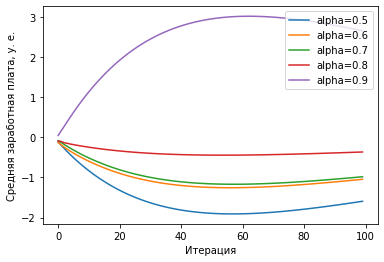

In [54]:
y1 = y = exp1.results['al_' + str(1.0) + '_bet_' + str(0.84)]
y2 = y = exp1.results['al_' + str(0.5) + '_bet_' + str(0.84)]
y3 = y = exp1.results['al_' + str(0.6) + '_bet_' + str(0.84)]
y4 = y = exp1.results['al_' + str(0.7) + '_bet_' + str(0.84)]
y5 = y = exp1.results['al_' + str(0.8) + '_bet_' + str(0.84)]
y6 = y = exp1.results['al_' + str(0.9) + '_bet_' + str(0.84)]
x = np.arange(0, len(y1))
plt.plot(x, [y2[i]-y1[i] for i in range(len(y1))], label=f'alpha=0.5')
plt.plot(x, [y3[i]-y1[i] for i in range(len(y1))], label=f'alpha=0.6')
plt.plot(x, [y4[i]-y1[i] for i in range(len(y1))], label=f'alpha=0.7')
plt.plot(x, [y5[i]-y1[i] for i in range(len(y1))], label=f'alpha=0.8')
plt.plot(x, [y6[i]-y1[i] for i in range(len(y1))], label=f'alpha=0.9')
plt.xlabel('Итерация')
plt.ylabel('Средняя заработная плата, у. е.')
plt.legend(loc='upper right')


In [55]:
exp2 = Experiment([1.0], [0.84], n_conn=2)
exp2.run()

exp3 = Experiment([1.0], [0.84], n_conn=5)
exp3.run()

exp4 = Experiment([1.0], [0.84], n_conn=10)
exp4.run()

exp5 = Experiment([1.0], [0.84], n_conn=20)
exp5.run()

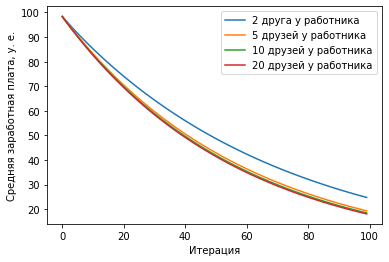

In [56]:
y1 = y = exp2.results['al_' + str(1.0) + '_bet_' + str(0.84)]
y2 = y = exp3.results['al_' + str(1.0) + '_bet_' + str(0.84)]
y3 = y = exp4.results['al_' + str(1.0) + '_bet_' + str(0.84)]
y4 = y = exp5.results['al_' + str(1.0) + '_bet_' + str(0.84)]
x = np.arange(0, len(y1))
plt.plot(x, [y1[i] for i in range(len(y1))], label=f'2 друга у работника')
plt.plot(x, [y2[i] for i in range(len(y1))], label=f'5 друзей у работника')
plt.plot(x, [y3[i] for i in range(len(y1))], label=f'10 друзей у работника')
plt.plot(x, [y4[i]for i in range(len(y1))], label=f'20 друзей у работника')
plt.xlabel('Итерация')
plt.ylabel('Средняя заработная плата, у. е.')
plt.legend(loc='upper right')

No handles with labels found to put in legend.


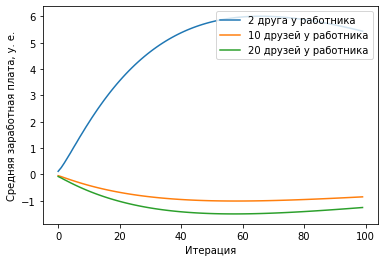

In [57]:
y1 = y = exp2.results['al_' + str(1.0) + '_bet_' + str(0.84)]
y2 = y = exp3.results['al_' + str(1.0) + '_bet_' + str(0.84)]
y3 = y = exp4.results['al_' + str(1.0) + '_bet_' + str(0.84)]
y4 = y = exp5.results['al_' + str(1.0) + '_bet_' + str(0.84)]
plt.xlabel('Итерация')
plt.ylabel('Средняя заработная плата, у. е.')
plt.legend(loc='upper right')
x = np.arange(0, len(y1))
plt.plot(x, [y1[i]-y2[i] for i in range(len(y1))], label=f'2 друга у работника')
# plt.plot(x, [y3[i]-y1[i] for i in range(len(y1))], label=f'5 друзей у работника')
plt.plot(x, [y3[i]-y2[i] for i in range(len(y1))], label=f'10 друзей у работника')
plt.plot(x, [y4[i]-y2[i] for i in range(len(y1))], label=f'20 друзей у работника')
plt.xlabel('Итерация')
plt.ylabel('Средняя заработная плата, у. е.')
plt.legend(loc='upper right')